In [1]:
import statsmodels.api as sm
import statsmodels.stats.diagnostic

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from statsmodels.tsa.api import VAR

def rmse(pred, actual):
    return np.sqrt(((pred - actual) ** 2).mean())


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic


In [2]:
# LOAD DATA

data_path = "../Year data P//"


df = pd.read_csv(data_path + 'United States//United States Data.csv')
df = df.loc[df['year'] >= 1980]
df = df.drop(['countrycode','country','currency_unit','year'],axis = 1)
year = pd.period_range('1980', '2019', freq='Y')
df.index = year

In [3]:
df.tail()

,GDP,net population growth,CPI,employment rate,labsh,xr,pl_gdpo,csh_c,csh_i,csh_g,...,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k,GDP.1
2015,2.706367,0.006919,0.118627,0.006716,0.002314,1,0.009475,0.003789,-0.008690,0.008618,...,0.008033,0.231836,0.005264,0.035784,-0.022346,-0.076790,-0.052604,0.020967,0,2.706367
2016,1.667473,0.006662,1.261583,0.007587,-0.003144,1,0.010526,0.008267,-0.043609,0.019087,...,-0.045373,-0.031309,0.012611,0.019253,-0.015518,-0.006224,0.000448,0.019282,0,1.667473
2017,2.255679,0.006405,2.130110,0.008471,0.004005,1,0.018750,0.001206,0.008015,0.016251,...,0.040339,0.027418,0.019573,0.017186,-0.008889,0.025241,0.005373,0.032821,0,2.255679
2018,2.918856,0.006188,2.442583,0.006725,-0.003061,1,0.024016,-0.003426,0.016857,-0.007135,...,0.016224,0.050254,0.021935,0.031214,0.030868,0.032341,0.037256,0.038351,0,2.918856
2019,2.288869,0.006018,1.812210,0.004319,0.004652,1,0.017724,0.002166,-0.008776,0.001324,...,-0.044207,-0.106677,0.015083,0.025477,0.012506,0.015249,0.006767,0.029960,0,2.288869


In [4]:
from sklearn.preprocessing import MinMaxScaler
Xscaler =MinMaxScaler()
df.iloc[:,0:]=Xscaler.fit_transform(df.values[:,0:])

In [5]:
df_train = df['1980':'2009']
df_test = df['2010':'2019']

In [6]:
for i in range(0,20):
    adfResult = sm.tsa.stattools.adfuller(df_train.iloc[:,i])
    if adfResult[1]<0.05:
        print(i)
        print(df.columns[i])
        print("stable")
    else:
        print(i)
        print(df.columns[i])
        print("UNstable")

0
GDP
stable
1
net population growth
UNstable
2
CPI
stable
3
employment rate
UNstable
4
labsh
stable
5
xr
UNstable
6
pl_gdpo
stable
7
csh_c
stable
8
csh_i
stable
9
csh_g
UNstable
10
csh_x
stable
11
csh_m
UNstable
12
csh_r
stable
13
pl_c
stable
14
pl_i
stable
15
pl_g
stable
16
pl_x
UNstable
17
pl_m
UNstable
18
pl_n
stable
19
pl_k
UNstable


/Users/Shared/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/Shared/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


In [7]:
df.iloc[:,1] = df.iloc[:,1].diff(1)
df.iloc[:,3] = df.iloc[:,3].diff(1)
df.iloc[:,5] = df.iloc[:,5].diff(1)
df.iloc[:,9] = df.iloc[:,9].diff(1)
df.iloc[:,11] = df.iloc[:,11].diff(1)
df.iloc[:,16] = df.iloc[:,16].diff(1)
df.iloc[:,17] = df.iloc[:,17].diff(1)
df.iloc[:,19] = df.iloc[:,19].diff(1)

df_train = df['1980':'2009']
df_test = df['2010':'2019']

In [8]:
for i in range(0,20):
    adfResult = sm.tsa.stattools.adfuller(df_train.iloc[1:,i])
    if adfResult[1]<0.05:
        print(i)
        print(df.columns[i])
        print("stable")
    else:
        print(i)
        print(df.columns[i])
        print("UNstable")

0
GDP
UNstable
1
net population growth
UNstable
2
CPI
stable
3
employment rate
stable
4
labsh
stable
5
xr
UNstable
6
pl_gdpo
UNstable
7
csh_c
stable
8
csh_i
stable
9
csh_g
stable
10
csh_x
stable
11
csh_m
UNstable
12
csh_r
stable
13
pl_c
stable
14
pl_i
stable
15
pl_g
stable
16
pl_x
UNstable
17
pl_m
stable
18
pl_n
UNstable
19
pl_k
UNstable


/Users/Shared/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/Shared/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


In [9]:
for i in range(0,20):
    result = sm.tsa.stattools.coint(df_train.iloc[1:,-1],df_train.iloc[1:,i])
    if result[1]<0.05:
        print(i)
        print(df.columns[i])
        print("coint")
    else:
        print(i)
        print(df.columns[i])
        print("not coint")

0
GDP
coint
1
net population growth
not coint
2
CPI
not coint
3
employment rate
not coint
4
labsh
not coint
5
xr
not coint
6
pl_gdpo
not coint
7
csh_c
not coint
8
csh_i
not coint
9
csh_g
not coint
10
csh_x
not coint
11
csh_m
coint
12
csh_r
not coint


/Users/Shared/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1721: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(


13
pl_c
not coint
14
pl_i
not coint
15
pl_g
not coint
16
pl_x
not coint
17
pl_m
not coint
18
pl_n
not coint
19
pl_k
not coint


In [10]:
df_train = df_train.iloc[1:,[0,2,4,7,8,9,12,15]]['1981':'2009']
df_test = df_test.iloc[1:,[0,2,4,7,8,9,12,15]]['2010':'2019']

In [11]:
### FIND BEST VAR ORDER with AIC ###
AIC = {}
best_aic, best_order = np.inf, 0
lagsToTest = 2
for i in range(1, lagsToTest):
    model = VAR(df_train.values)
    model_result = model.fit(i)
    AIC[i] = model_result.aic

    if AIC[i] < best_aic:
        best_aic = AIC[i]
        best_order = i

print('BEST ORDER:', best_order, 'BEST AIC:', best_aic)

BEST ORDER: 1 BEST AIC: -32.88167724464547


In [12]:
### FIT FINAL VAR WITH LAG CORRESPONTING TO THE BEST AIC ###
var = VAR(df_train)
var_result = var.fit(maxlags=best_order)
print("var_result.aic: ", var_result.aic)

var_result.aic:  -32.88167724464547


In [13]:
print(len(df_test.values[-best_order:]))

forecast_input = df_test.values[-best_order:]

# Forecast
fc = var_result.forecast(y = forecast_input, steps=5)
df_forecast = pd.DataFrame(fc, index=pd.period_range(start = '2020',end = '2024',freq = 'Y'), columns=df_test.columns)
#print(df_forecast)

1


<AxesSubplot:>

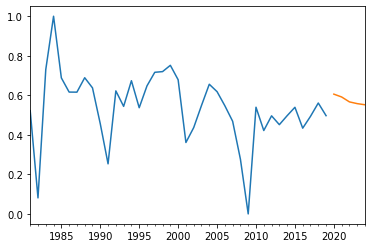

In [14]:
plt.figure()
df.iloc[1:,0].plot()
df_forecast.iloc[:,0].plot()

In [15]:
predict_Test = var_result.forecast(y = df_train.values, steps=9)
rmse(predict_Test[:,0],df_test.iloc[:,0].values)

0.08630556977053754

In [16]:
predict_Test[:,0]

array([0.30634381, 0.32654855, 0.36538434, 0.43195056, 0.48138966,
       0.50929928, 0.52874902, 0.5418262 , 0.54805756])

In [17]:
df_test.iloc[:,0].values

array([0.42187549, 0.49616917, 0.45155856, 0.49689036, 0.53944476,
       0.43382871, 0.49362691, 0.56104682, 0.49700107])

<AxesSubplot:>

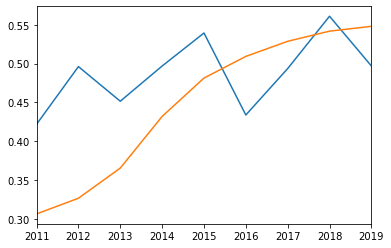

In [18]:
predict_Test = pd.DataFrame(predict_Test, index=pd.period_range(start = '2011',end = '2019',freq = 'Y'))
plt.figure()
df_test.iloc[:,0].plot()
predict_Test.iloc[:,0].plot()

0.15440890840281973


<AxesSubplot:>

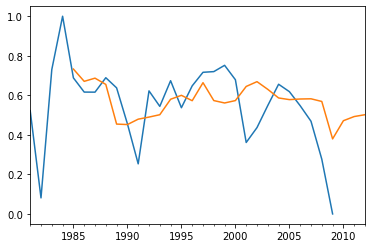

In [19]:
fitted_value = np.zeros((28,df_train.shape[1]))
for i in range(0,28,4):
    a = var_result.forecast(y = df_train.iloc[i:i+4,:].values, steps=4)
    fitted_value[i:i+4,:] = a

fitted_value = pd.DataFrame(fitted_value, index=pd.period_range(start = '1985',end = '2012',freq = 'Y'), columns=df_train.columns)
#print(df_forecast)

print(rmse(fitted_value.iloc[:-3,0],df_train.iloc[4:,0].values))
plt.figure()
df_train.iloc[:,0].plot()
fitted_value.iloc[:,0].plot()

InvalidIndexError: (slice(None, None, None), None)

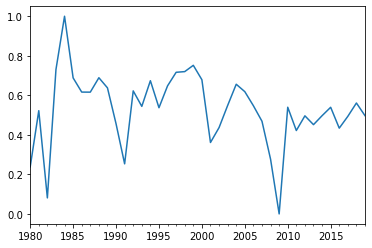

In [20]:
a = pd.DataFrame(np.hstack((fitted_value.iloc[:-1,0].values,predict_Test.iloc[:,0].values,df_forecast.iloc[:,0].values)),index=pd.period_range(start = '1984',end = '2024',freq = 'Y'))
plt.figure()
df.iloc[:,0].plot()
plt.plot(pd.period_range(start = '1984',end = '2024',freq = 'Y'),a)

plt.xlim(['1980','2028'])
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.show()